## MTN Nigeria Customer Churn Prediction - Exploratory Data Analysis (EDA)

**Business Objective**  
Predict customers at high risk of churning so MTN Nigeria can proactively design retention interventions (better bundles, network quality fixes, loyalty rewards, targeted offers) → protect & grow revenue in a very competitive telecom market.

**Notebook Goal**  
In this notebook we perform a thorough Exploratory Data Analysis (EDA) on the customer-level dataset we created in `01_data_preparation.ipynb`.  

**Core objective:**
Understand the data deeply, uncover patterns, relationships, and key drivers of churn so that we can:
- Build strong intuition about what actually predicts churn in this MTN Nigeria dataset
- Identify the most promising features (and potential new ones) for modeling
- Spot data quality issues, outliers, or missing value patterns that could affect model performance
- Generate business-relevant insights that we can immediately translate into retention recommendations

**Setup & Libraries Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Better visuals
plt.style.use('seaborn-v0_8-bright')
sns.set_palette("muted")
%matplotlib inline

# Optional: increase figure size defaults
# plt.rcParams['figure.figsize'] = (10, 6)
# plt.rcParams['font.size'] = 12

### Load and Inspect Customer-Level Dataset

In [3]:
data = pd.read_csv(r"C:\Users\KOLADE\OneDrive\Documents\AkoladeDSJourney\MTN-Nigeria-Customer-Churn\data\processed\mtn_customer_level_churn.csv")
df = data.copy()
print(f"Dataframe shape: {df.shape}")
print(f"\nColumns: {df.columns.values}")   

Dataframe shape: (496, 23)

Columns: ['Customer ID' 'Age' 'State' 'Gender' 'Device_Count' 'Active_Months'
 'Total_Purchases' 'Avg_Unit_Price' 'Total_Revenue'
 'Avg_Satisfaction_Rate' 'Primary_Review' 'Customer_Tenure_Months'
 'Avg_Data_Usage_GB' 'Total_Data_Usage_GB' 'Avg_GB_Purchased'
 'Total_GB_Purchased' 'Primary_Plan_Type' 'Churn_Status'
 'Reasons_for_Churn' 'Churn' 'Usage_vs_Purchased_Ratio'
 'Revenue_per_Purchase' 'Tenure_Bucket']


In [4]:
df.head()

,Customer ID,Age,State,Gender,Device_Count,Active_Months,Total_Purchases,Avg_Unit_Price,Total_Revenue,Avg_Satisfaction_Rate,...,Total_Data_Usage_GB,Avg_GB_Purchased,Total_GB_Purchased,Primary_Plan_Type,Churn_Status,Reasons_for_Churn,Churn,Usage_vs_Purchased_Ratio,Revenue_per_Purchase,Tenure_Bucket
0,CUST0001,27,Kwara,Male,1,1,19,35000.000000,665000,2.0,...,44.48,165.000000,3135.0,Monthly,Yes,Relocation,1,0.014188,35000.00000,0-6
1,CUST0002,16,Abuja (FCT),Female,1,1,12,5500.000000,66000,2.0,...,19.79,12.500000,150.0,Monthly,Yes,Better Offers from Competitors,1,0.131933,5500.00000,13-24
2,CUST0003,21,Sokoto,Male,3,1,31,9833.333333,299000,1.0,...,283.03,60.333333,1658.0,Monthly,No,NaN,0,0.170706,9645.16129,37+
3,CUST0004,36,Gombe,Female,1,1,9,4500.000000,40500,1.0,...,92.72,10.000000,90.0,Monthly,No,NaN,0,1.030222,4500.00000,13-24
4,CUST0005,57,Oyo,Male,1,1,16,9000.000000,144000,3.0,...,42.92,25.000000,400.0,Monthly,No,NaN,0,0.107300,9000.00000,37+


In [5]:
print(f"Duplicate rows: {df.duplicated().sum()}\n")
print(f"Missing values:\n{df.isnull().sum()}")

Duplicate rows: 0

Missing values:
Customer ID                   0
Age                           0
State                         0
Gender                        0
Device_Count                  0
Active_Months                 0
Total_Purchases               0
Avg_Unit_Price                0
Total_Revenue                 0
Avg_Satisfaction_Rate         0
Primary_Review                0
Customer_Tenure_Months        0
Avg_Data_Usage_GB             0
Total_Data_Usage_GB           0
Avg_GB_Purchased              0
Total_GB_Purchased            0
Primary_Plan_Type             0
Churn_Status                  0
Reasons_for_Churn           350
Churn                         0
Usage_vs_Purchased_Ratio      0
Revenue_per_Purchase          0
Tenure_Bucket                 0
dtype: int64


In [6]:
df[df['Reasons_for_Churn'].isnull()]['Churn_Status'].value_counts()

Churn_Status
No    350
Name: count, dtype: int64

In [7]:
df['Customer ID'].nunique()

496

- There is no duplicated data
- The missing value in `Reasons for Churn` is expected - Since customer didn't churn, there should be no reason for churn
- All `Customer ID` are unique

### Univariate Analysis
Understand each variable individually

#### Target Variable

In [8]:
df[['Churn', 'Churn_Status']]

,Churn,Churn_Status
0,1,Yes
1,1,Yes
2,0,No
3,0,No
4,0,No
...,...,...
491,1,Yes
492,0,No
493,0,No
494,0,No


In [9]:
print(df['Churn_Status'].value_counts(dropna=False))
print(f"\nChurn rate: {df['Churn'].mean() * 100:.2f}%")

Churn_Status
No     350
Yes    146
Name: count, dtype: int64

Churn rate: 29.44%


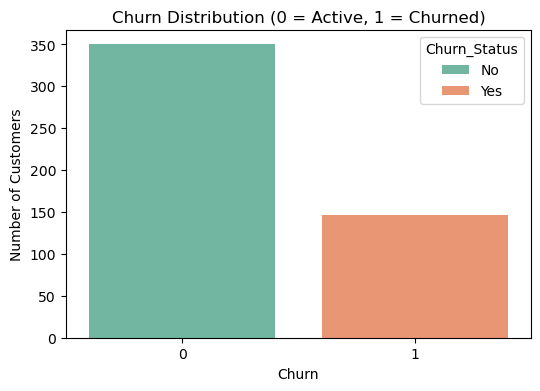

Insight: Class imbalance level → moderate


In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2', hue='Churn_Status')
plt.title('Churn Distribution (0 = Active, 1 = Churned)')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

print("Insight: Class imbalance level →", "severe" if df['Churn'].mean() < 0.15 else "moderate" if df['Churn'].mean() < 0.3 else "balanced")

#### Demographic & Geography

In [11]:
demo_cols = ['Age', 'Gender', 'State']
df[demo_cols].head() # Check the demographic columns

,Age,Gender,State
0,27,Male,Kwara
1,16,Female,Abuja (FCT)
2,21,Male,Sokoto
3,36,Female,Gombe
4,57,Male,Oyo



Variable: Age
count    496.000000
mean      47.572581
std       17.892913
min       16.000000
25%       31.750000
50%       48.500000
75%       63.000000
max       80.000000
Name: Age, dtype: float64


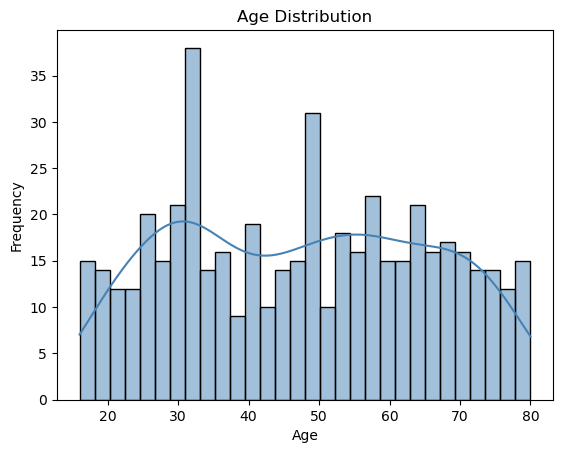

Missing: 0.00%



Variable: Gender
Gender
Female    250
Male      246
Name: count, dtype: int64


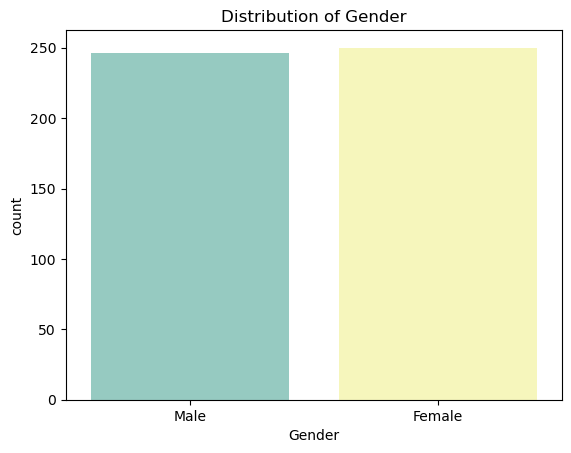

Missing: 0.00%



Variable: State
Top 15 States:
 State
Kogi           20
Osun           20
Bauchi         20
Abia           18
Borno          18
Abuja (FCT)    17
Enugu          17
Yobe           17
Oyo            17
Edo            16
Benue          16
Imo            16
Gombe          16
Katsina        16
Ekiti          16
Name: count, dtype: int64


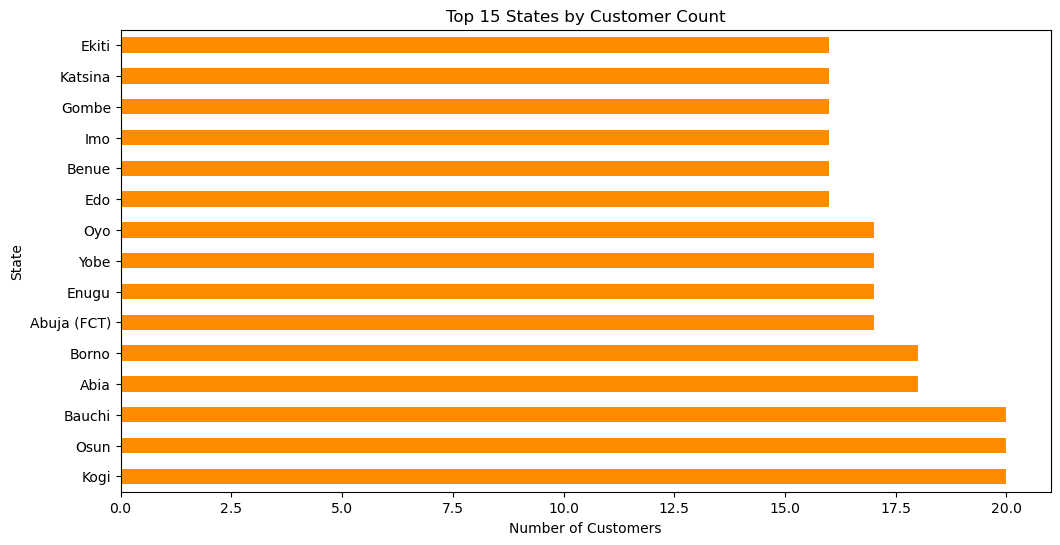

Missing: 0.00%




In [12]:
for col in demo_cols:
    print(f"\n{'='*50}\nVariable: {col}")
    
    if col == 'State':
        # Top 15 states only (high cardinality)
        top_states = df['State'].value_counts().head(15)
        print("Top 15 States:\n", top_states)
        
        plt.figure(figsize=(12, 6))
        top_states.plot(kind='barh', color='darkorange')
        plt.title('Top 15 States by Customer Count')
        plt.xlabel('Number of Customers')
        plt.show()
    elif col == 'Age':
        print(df[col].describe())
        sns.histplot(data=df, x=col, bins=30, kde=True, color='steelblue')
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(df[col].value_counts(dropna=False))
        sns.countplot(data=df, x=col, palette='Set3', hue=col)
        plt.title(f'Distribution of {col}')
        plt.show()
    
    print(f"Missing: {df[col].isna().mean()*100:.2f}%")
    print("\n")

#### Key Behavioural & Value Features

In [13]:
important_cols = [
    'Total_Revenue', 'Total_Data_Usage_GB', 'Usage_vs_Purchased_Ratio',
    'Avg_Satisfaction_Rate', 'Customer_Tenure_Months',
    'Revenue_per_Purchase', 'Total_Purchases'
]
df[important_cols].head() # Check the important numeric columns

,Total_Revenue,Total_Data_Usage_GB,Usage_vs_Purchased_Ratio,Avg_Satisfaction_Rate,Customer_Tenure_Months,Revenue_per_Purchase,Total_Purchases
0,665000,44.48,0.014188,2.0,2,35000.00000,19
1,66000,19.79,0.131933,2.0,22,5500.00000,12
2,299000,283.03,0.170706,1.0,60,9645.16129,31
3,40500,92.72,1.030222,1.0,14,4500.00000,9
4,144000,42.92,0.107300,3.0,53,9000.00000,16



Variable: Total_Revenue
count    4.960000e+02
mean     4.019117e+05
std      4.647891e+05
min      9.000000e+02
25%      1.043750e+05
50%      2.822500e+05
75%      5.355000e+05
max      3.340000e+06
Name: Total_Revenue, dtype: float64
Missing: 0.00%


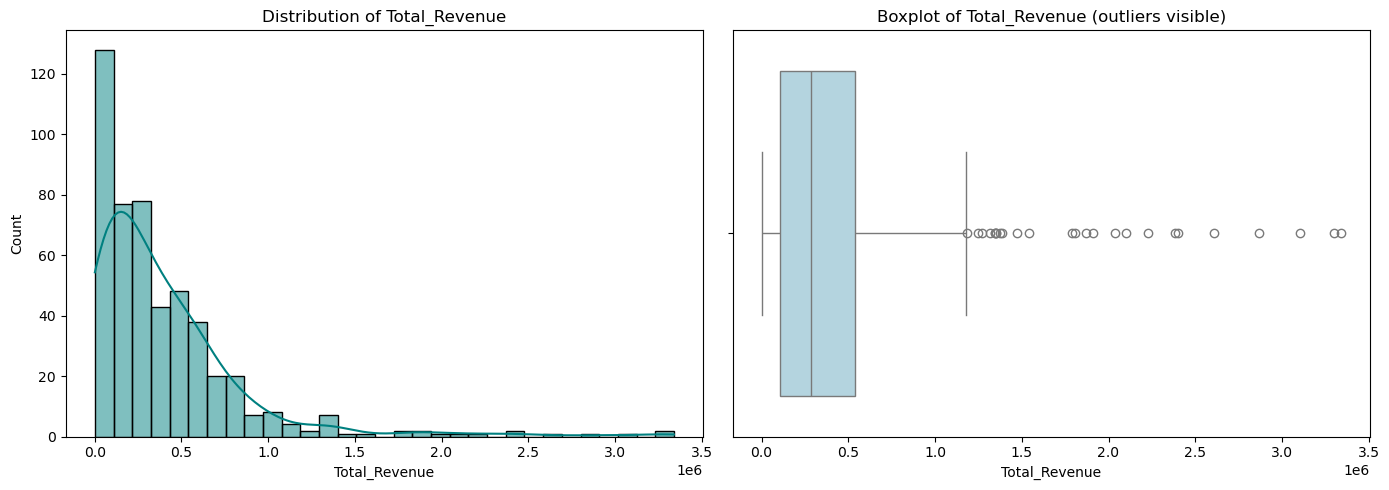

Quick notes:
• Skewness direction → right-skewed (positive)
• Extreme values? → No major extremes
• Business intuition → High variance likely → strong predictor candidate



Variable: Total_Data_Usage_GB
count    496.000000
mean     195.005726
std      110.457438
min        0.890000
25%      118.507500
50%      176.935000
75%      274.925000
max      508.510000
Name: Total_Data_Usage_GB, dtype: float64
Missing: 0.00%


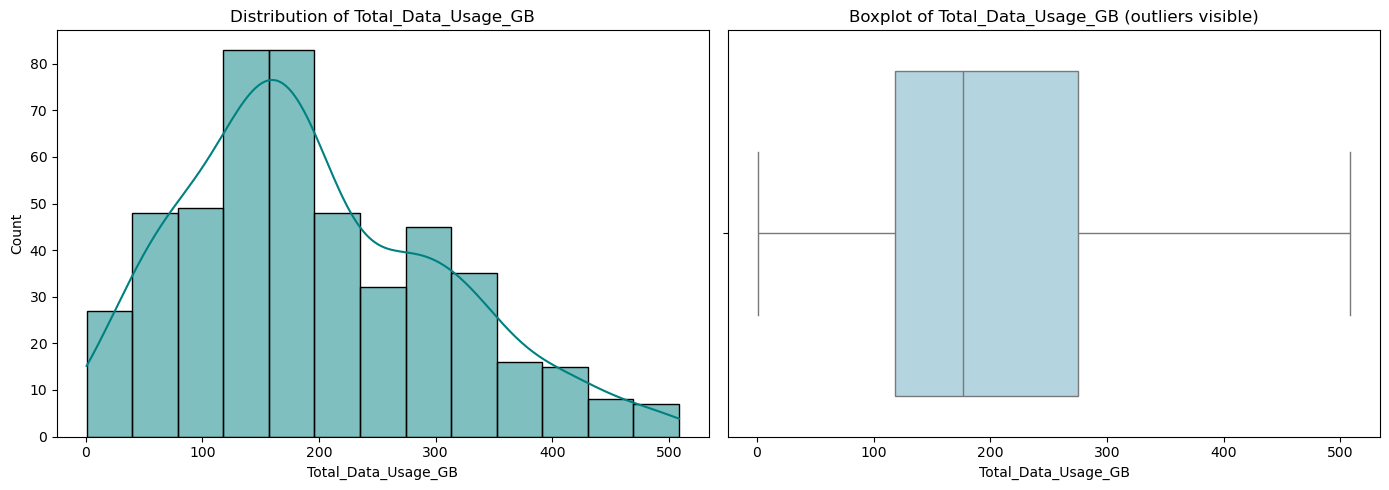

Quick notes:
• Skewness direction → right-skewed (positive)
• Extreme values? → No major extremes
• Business intuition → Moderate variation



Variable: Usage_vs_Purchased_Ratio
count    496.000000
mean       1.246526
std        5.793189
min        0.000041
25%        0.056011
50%        0.129335
75%        0.436177
max       81.698816
Name: Usage_vs_Purchased_Ratio, dtype: float64
Missing: 0.00%


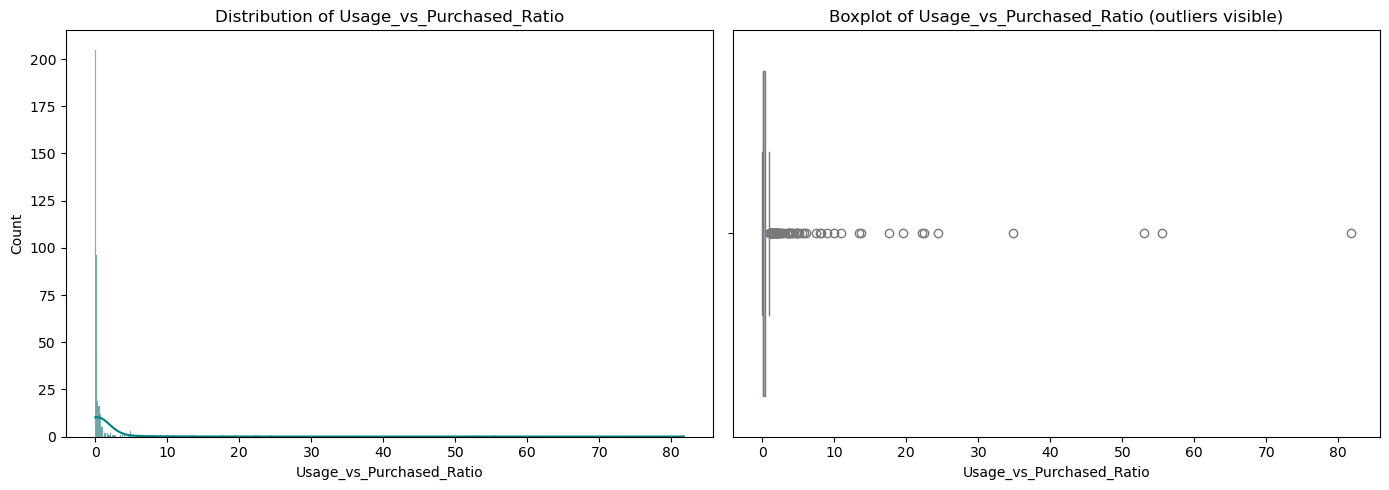

Quick notes:
• Skewness direction → right-skewed (positive)
• Extreme values? → Yes – investigate
• Business intuition → High variance likely → strong predictor candidate



Variable: Avg_Satisfaction_Rate
count    496.000000
mean       2.977823
std        1.378592
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Avg_Satisfaction_Rate, dtype: float64
Missing: 0.00%


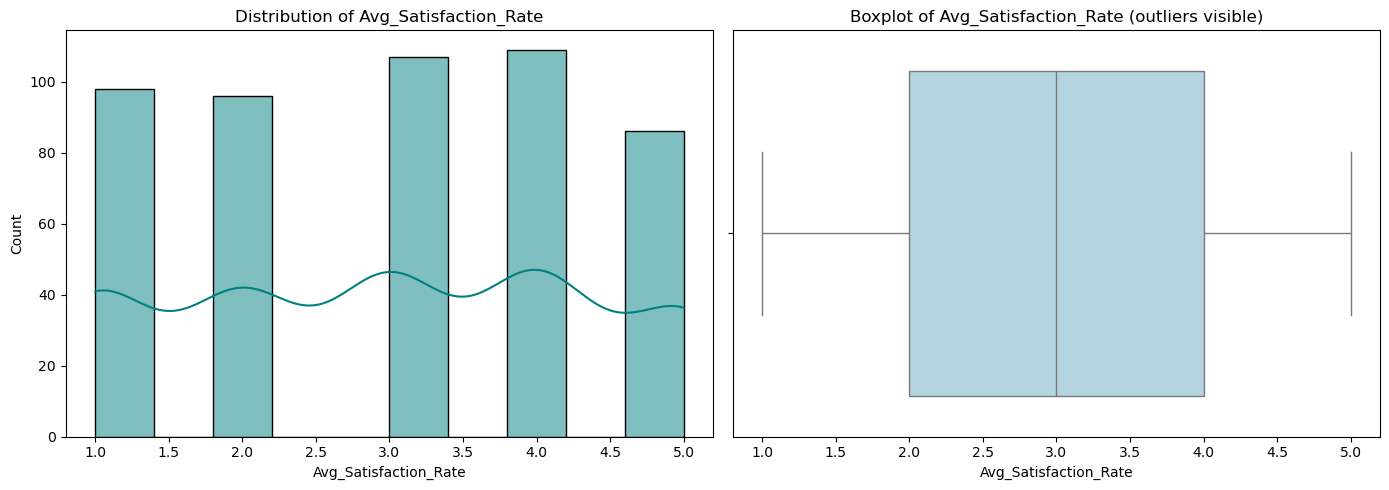

Quick notes:
• Skewness direction → roughly symmetric
• Extreme values? → No major extremes
• Business intuition → Moderate variation



Variable: Customer_Tenure_Months
count    496.000000
mean      31.463710
std       17.366597
min        1.000000
25%       17.000000
50%       31.000000
75%       47.000000
max       60.000000
Name: Customer_Tenure_Months, dtype: float64
Missing: 0.00%


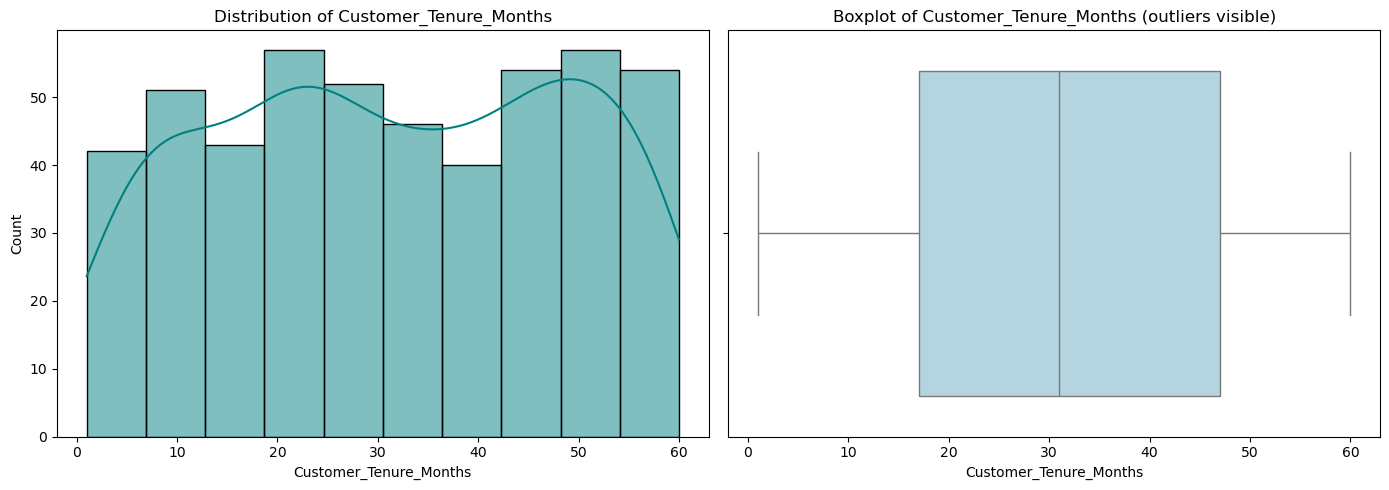

Quick notes:
• Skewness direction → roughly symmetric
• Extreme values? → No major extremes
• Business intuition → Moderate variation



Variable: Revenue_per_Purchase
count       496.000000
mean      19222.177457
std       21392.751892
min         350.000000
25%        7597.826087
50%       14500.000000
75%       23129.901961
max      150000.000000
Name: Revenue_per_Purchase, dtype: float64
Missing: 0.00%


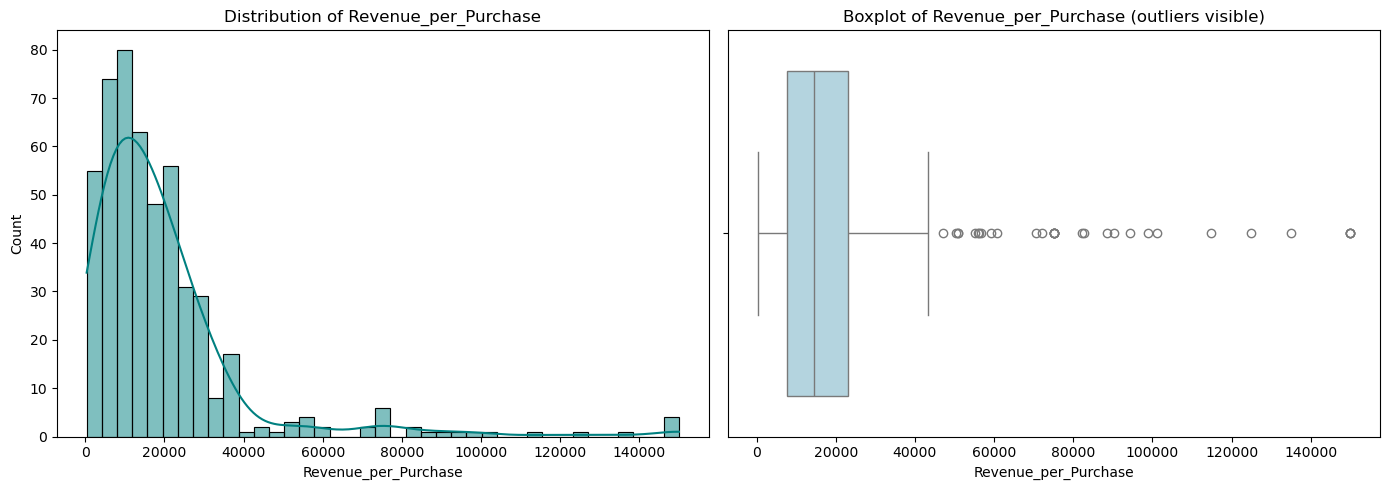

Quick notes:
• Skewness direction → right-skewed (positive)
• Extreme values? → No major extremes
• Business intuition → High variance likely → strong predictor candidate



Variable: Total_Purchases
count    496.000000
mean      20.745968
std       11.314601
min        1.000000
25%       13.000000
50%       20.000000
75%       28.000000
max       51.000000
Name: Total_Purchases, dtype: float64
Missing: 0.00%


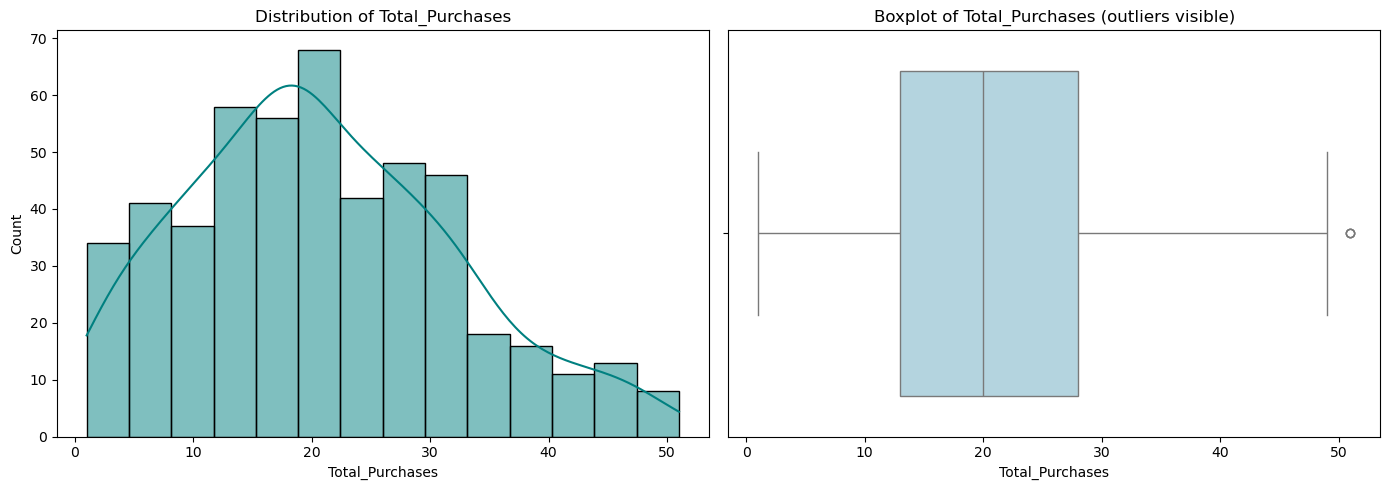

Quick notes:
• Skewness direction → roughly symmetric
• Extreme values? → No major extremes
• Business intuition → Moderate variation




In [14]:
for col in important_cols:
    print(f"\n{'='*50}\nVariable: {col}")
    print(df[col].describe())
    
    # Missing check
    miss = df[col].isna().mean() * 100
    print(f"Missing: {miss:.2f}%")
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram / KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[0], color='teal')
    axes[0].set_title(f'Distribution of {col}')
    
    # Boxplot (outliers)
    sns.boxplot(data=df, x=col, ax=axes[1], color='lightblue')
    axes[1].set_title(f'Boxplot of {col} (outliers visible)')
    
    plt.tight_layout()
    plt.show()
    
    # Quick interpretation
    print("Quick notes:")
    print("• Skewness direction →", "right-skewed (positive)" if df[col].skew() > 0.5 else "left-skewed" if df[col].skew() < -0.5 else "roughly symmetric")
    print("• Extreme values? →", "Yes – investigate" if df[col].max() > df[col].quantile(0.99)*3 else "No major extremes")
    print("• Business intuition →", "High variance likely → strong predictor candidate" if df[col].std() / df[col].mean() > 1 else "Moderate variation")
    print("\n")

#### Plan & Device Behaviour

In [15]:
df['Is_Multi_Device'] = df['Device_Count'].apply(lambda x: "Yes" if x > 1 else "No")
plan_device_cols = [    
    'Primary_Plan_Type', 'Avg_GB_Purchased', 'Device_Count',
    'Is_Multi_Device', 'Active_Months'
]
df[plan_device_cols].head() # Check the plan/device columns

,Primary_Plan_Type,Avg_GB_Purchased,Device_Count,Is_Multi_Device,Active_Months
0,Monthly,165.000000,1,No,1
1,Monthly,12.500000,1,No,1
2,Monthly,60.333333,3,Yes,1
3,Monthly,10.000000,1,No,1
4,Monthly,25.000000,1,No,1



------------------------------------------------------------
Variable: Primary_Plan_Type
Primary_Plan_Type
Monthly    387
2-Day       58
Daily       30
3-Month     17
Yearly       4
Name: count, dtype: int64


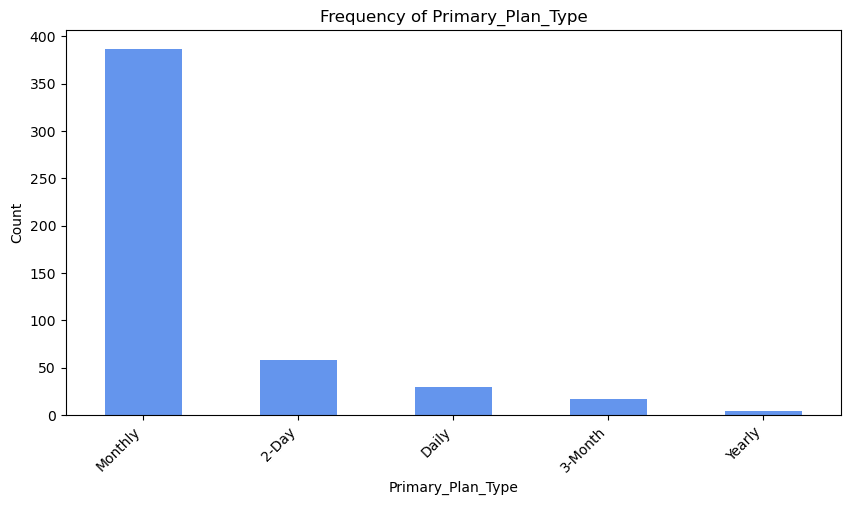

Unique values: 5
Missing: 0.00%



------------------------------------------------------------
Variable: Avg_GB_Purchased
count     496.000000
mean      125.807052
std       192.778200
min         0.488281
25%        25.000000
50%        74.583333
75%       150.437500
max      1536.000000
Name: Avg_GB_Purchased, dtype: float64


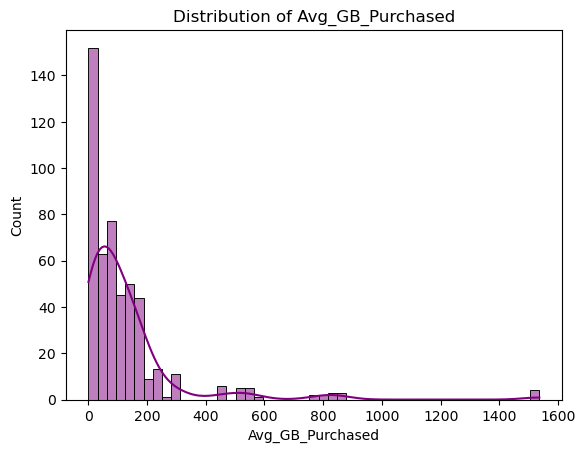

Unique values: 222
Missing: 0.00%



------------------------------------------------------------
Variable: Device_Count
Device_Count
2    183
1    171
3    142
Name: count, dtype: int64


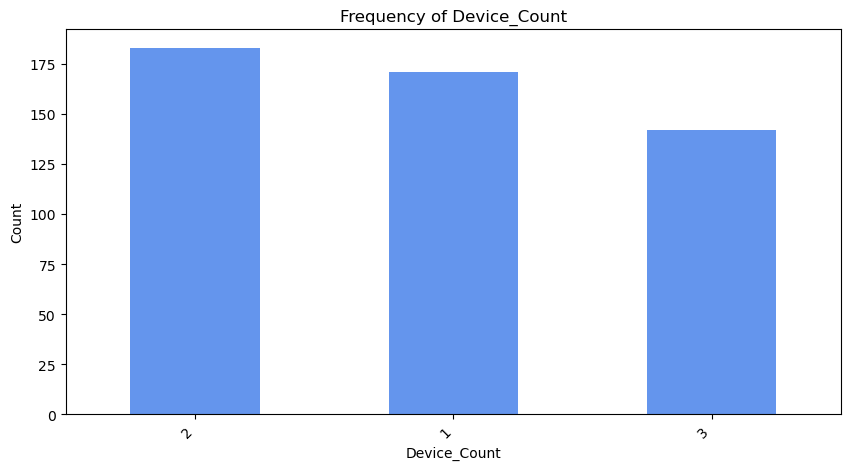

Unique values: 3
Missing: 0.00%



------------------------------------------------------------
Variable: Is_Multi_Device
Is_Multi_Device
Yes    325
No     171
Name: count, dtype: int64


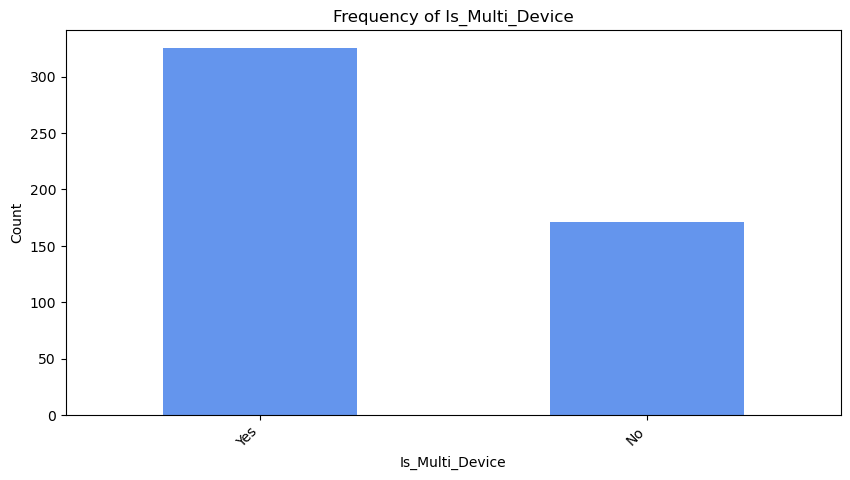

Unique values: 2
Missing: 0.00%



------------------------------------------------------------
Variable: Active_Months
Active_Months
1    495
2      1
Name: count, dtype: int64


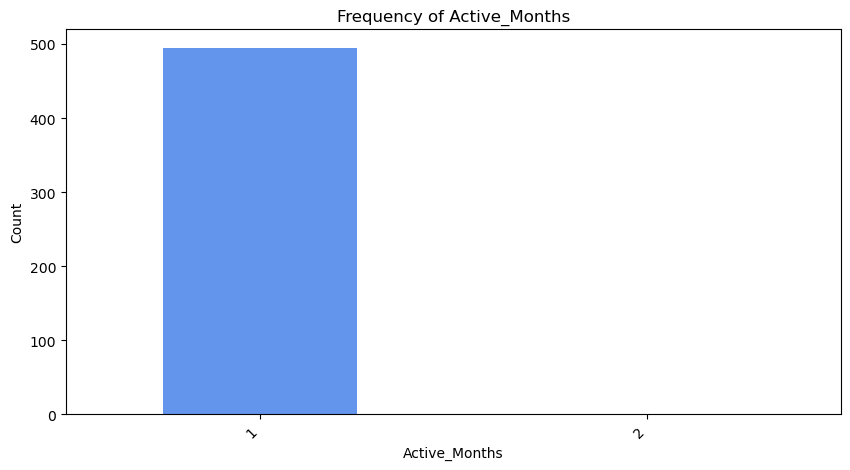

Unique values: 2
Missing: 0.00%




In [16]:
for col in plan_device_cols:
    print(f"\n{'-'*60}\nVariable: {col}")
    
    if df[col].dtype == 'object' or df[col].nunique() <= 15:
        vc = df[col].value_counts(dropna=False)
        print(vc)
        
        plt.figure(figsize=(10, 5))
        vc.plot(kind='bar', color='cornflowerblue')
        plt.title(f'Frequency of {col}')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
        print(df[col].describe())
        sns.histplot(df[col], kde=True, color='purple')
        plt.title(f'Distribution of {col}')
        plt.show()
    
    print(f"Unique values: {df[col].nunique()}")
    print(f"Missing: {df[col].isna().mean()*100:.2f}%")
    print("\n")

#### Satisfaction & Review

Primary_Review distribution:


Primary_Review
Very Good    109
Good         107
Poor          98
Fair          96
Excellent     86
Name: count, dtype: int64

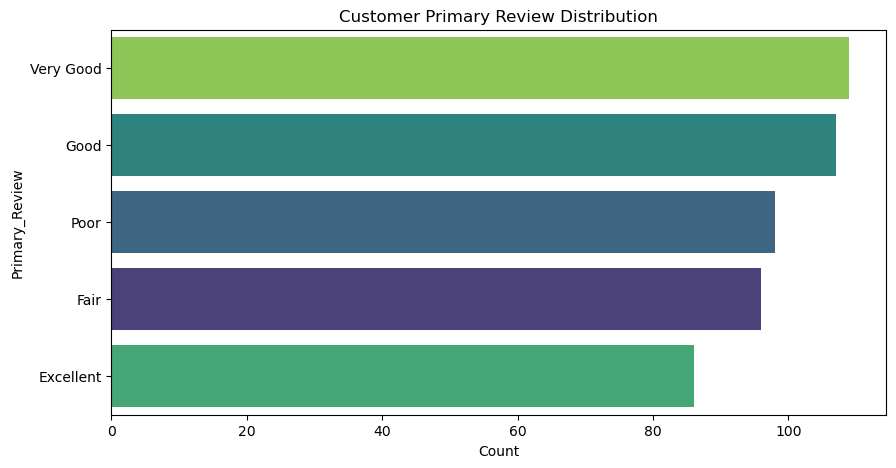

Avg_Satisfaction_Rate stats:
count    496.000000
mean       2.977823
std        1.378592
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Avg_Satisfaction_Rate, dtype: float64


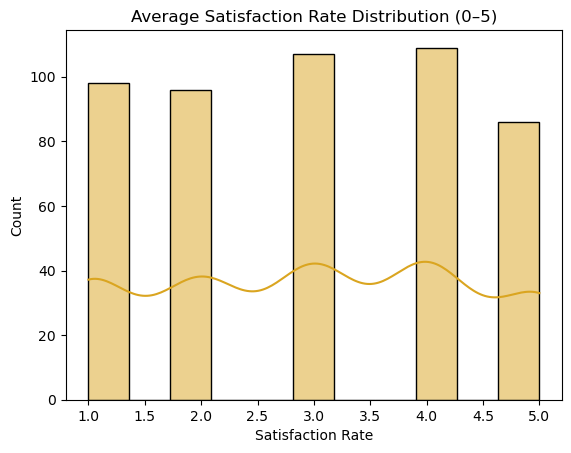

In [17]:
print("Primary_Review distribution:")
display(df['Primary_Review'].value_counts(dropna=False))

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Primary_Review', order=df['Primary_Review'].value_counts().index, palette='viridis', hue='Primary_Review')
plt.title('Customer Primary Review Distribution')
plt.xlabel('Count')
plt.show()

print("Avg_Satisfaction_Rate stats:")
print(df['Avg_Satisfaction_Rate'].describe())

sns.histplot(df['Avg_Satisfaction_Rate'], bins=11, kde=True, color='goldenrod')
plt.title('Average Satisfaction Rate Distribution (0–5)')
plt.xlabel('Satisfaction Rate')
plt.show()

### Bivariate Analysis
Understands how key features relates with churn (target feature)

#### Separating Numerical & Categorical Features

In [18]:
numerical_col = []
categorical_col = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_col.append(col)
    else:
        categorical_col.append(col)

In [19]:
cat_col_to_drop = ['Customer ID', 'Churn_Status', 'Reasons_for_Churn']
categorical_col = [col for col in categorical_col if col not in cat_col_to_drop]
categorical_col

['State',
 'Gender',
 'Primary_Review',
 'Primary_Plan_Type',
 'Tenure_Bucket',
 'Is_Multi_Device']

In [20]:
numerical_col.remove('Churn') # Remove target variable from features list
numerical_col

['Age',
 'Device_Count',
 'Active_Months',
 'Total_Purchases',
 'Avg_Unit_Price',
 'Total_Revenue',
 'Avg_Satisfaction_Rate',
 'Customer_Tenure_Months',
 'Avg_Data_Usage_GB',
 'Total_Data_Usage_GB',
 'Avg_GB_Purchased',
 'Total_GB_Purchased',
 'Usage_vs_Purchased_Ratio',
 'Revenue_per_Purchase']

#### Categorical Features vs Churn

In [21]:
print(categorical_col)

['State', 'Gender', 'Primary_Review', 'Primary_Plan_Type', 'Tenure_Bucket', 'Is_Multi_Device']


In [22]:
# Helper function for churn rate by categorical
def churn_rate_by_cat(df, col):
    crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    crosstab.columns = ['Active (%)', 'Churned (%)']
    print(f"\nChurn Rate by {col}:\n", crosstab.round(2))
    crosstab.plot(kind='barh', stacked=True, figsize=(10, 5), colormap='Set2')
    plt.title(f'Churn Rate by {col}')
    plt.xlabel('% of Customers')
    plt.show()

    # Quick note
    print("Quick notes:")
    print("• Strong signal? →", "Yes" if crosstab['Churned (%)'].max() - crosstab['Churned (%)'].min() > 20 else "Moderate/No")
    print("• Business intuition → Target high-churn groups (e.g., 'Poor' review) with offers")


Bivariate: Gender vs Churn

Churn Rate by Gender:
         Active (%)  Churned (%)
Gender                         
Female       69.20        30.80
Male         71.95        28.05


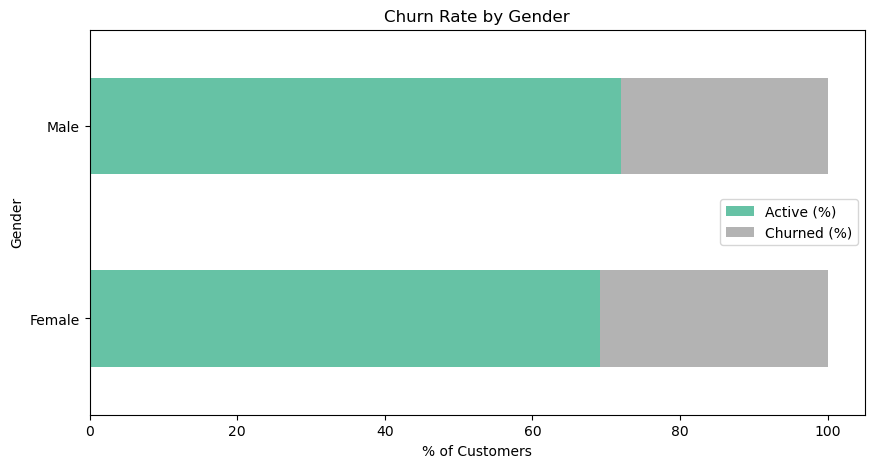

Quick notes:
• Strong signal? → Moderate/No
• Business intuition → Target high-churn groups (e.g., 'Poor' review) with offers

Bivariate: Primary_Review vs Churn

Churn Rate by Primary_Review:
                 Active (%)  Churned (%)
Primary_Review                         
Excellent            63.95        36.05
Fair                 68.75        31.25
Good                 74.77        25.23
Poor                 73.47        26.53
Very Good            70.64        29.36


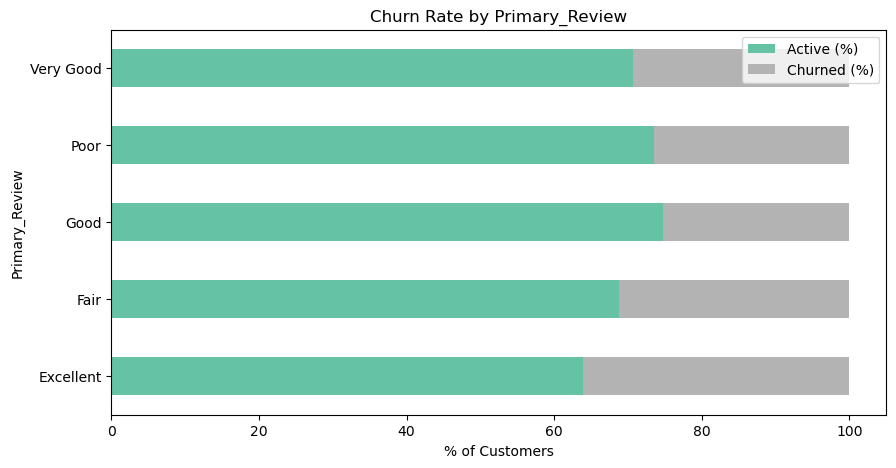

Quick notes:
• Strong signal? → Moderate/No
• Business intuition → Target high-churn groups (e.g., 'Poor' review) with offers

Bivariate: Primary_Plan_Type vs Churn

Churn Rate by Primary_Plan_Type:
                    Active (%)  Churned (%)
Primary_Plan_Type                         
2-Day                   60.34        39.66
3-Month                 82.35        17.65
Daily                   63.33        36.67
Monthly                 71.83        28.17
Yearly                 100.00         0.00


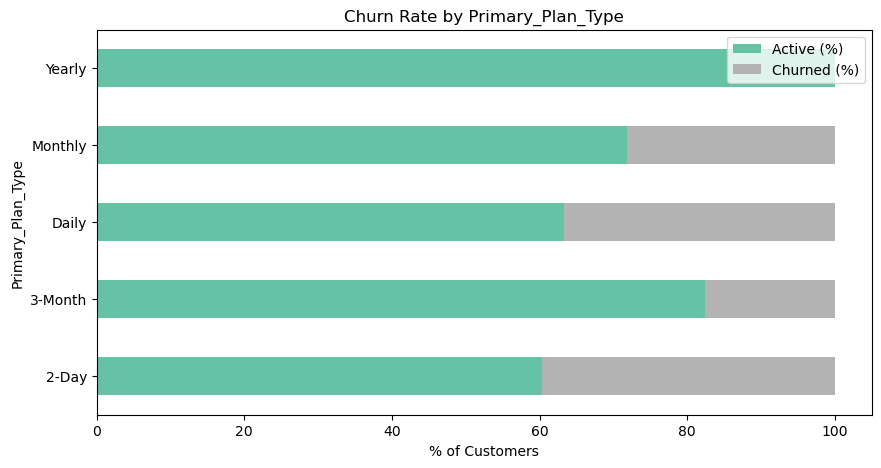

Quick notes:
• Strong signal? → Yes
• Business intuition → Target high-churn groups (e.g., 'Poor' review) with offers

Bivariate: Tenure_Bucket vs Churn

Churn Rate by Tenure_Bucket:
                Active (%)  Churned (%)
Tenure_Bucket                         
0-6                 76.19        23.81
13-24               76.00        24.00
25-36               67.35        32.65
37+                 69.27        30.73
7-12                66.67        33.33


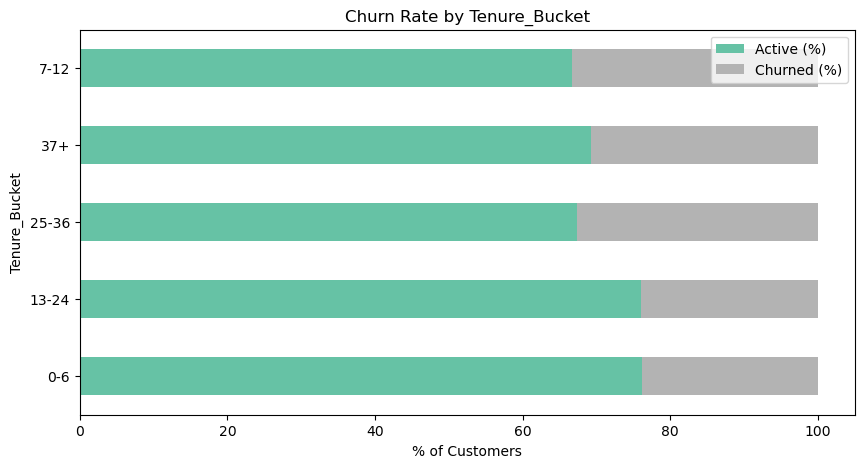

Quick notes:
• Strong signal? → Moderate/No
• Business intuition → Target high-churn groups (e.g., 'Poor' review) with offers

Bivariate: Is_Multi_Device vs Churn

Churn Rate by Is_Multi_Device:
                  Active (%)  Churned (%)
Is_Multi_Device                         
No                    69.01        30.99
Yes                   71.38        28.62


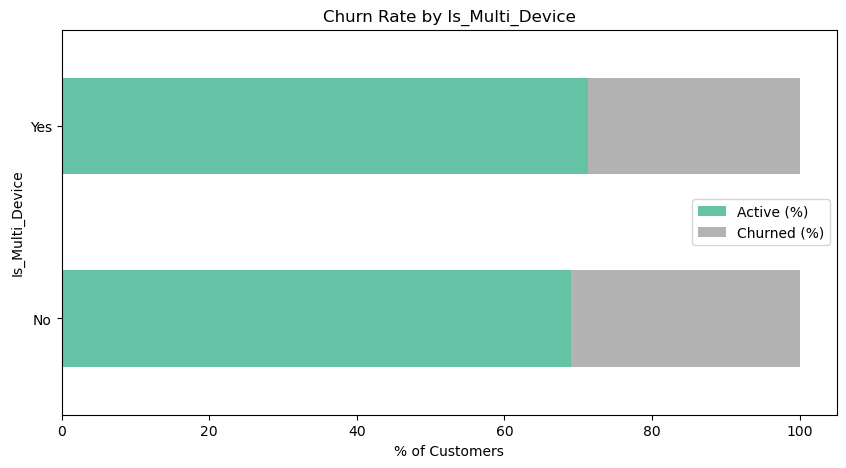

Quick notes:
• Strong signal? → Moderate/No
• Business intuition → Target high-churn groups (e.g., 'Poor' review) with offers


In [23]:
for col in categorical_col:
    if col == 'State':  # Skip State for now due to high cardinality
        continue
    print(f"\n{'='*50}\nBivariate: {col} vs Churn")
    churn_rate_by_cat(df, col)


Churn Rate by State:
              Active (%)  Churned (%)
State                               
Abia              66.67        33.33
Abuja (FCT)       64.71        35.29
Bauchi            85.00        15.00
Borno             88.89        11.11
Edo               62.50        37.50
Enugu             76.47        23.53
Kogi              75.00        25.00
Osun              85.00        15.00
Oyo               70.59        29.41
Yobe              58.82        41.18


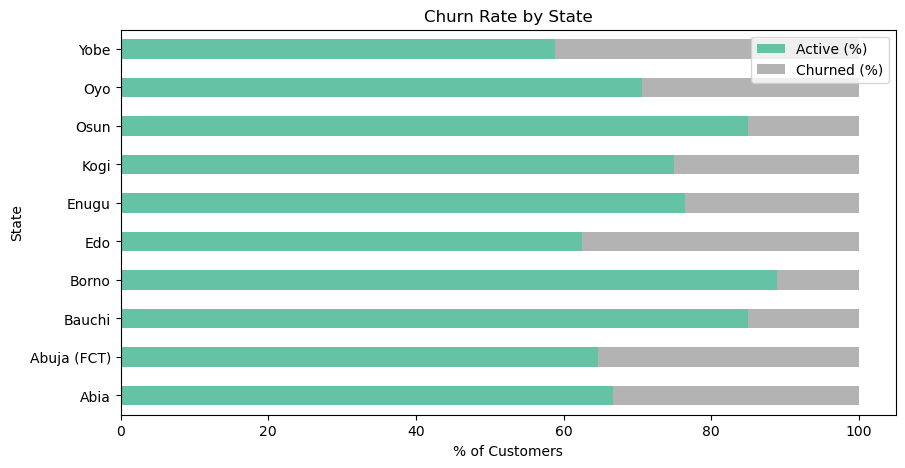

Quick notes:
• Strong signal? → Yes
• Business intuition → Target high-churn groups (e.g., 'Poor' review) with offers


In [24]:
# For State (high cardinality) – top 10 only
top_states = df['State'].value_counts().index[:10]
df_top_states = df[df['State'].isin(top_states)]
churn_rate_by_cat(df_top_states, 'State')

#### Numeric Features vs Churn

In [25]:
print(numerical_col)

['Age', 'Device_Count', 'Active_Months', 'Total_Purchases', 'Avg_Unit_Price', 'Total_Revenue', 'Avg_Satisfaction_Rate', 'Customer_Tenure_Months', 'Avg_Data_Usage_GB', 'Total_Data_Usage_GB', 'Avg_GB_Purchased', 'Total_GB_Purchased', 'Usage_vs_Purchased_Ratio', 'Revenue_per_Purchase']


In [26]:
# Helper for numeric vs churn
def numeric_vs_churn(df, col):
    print(f"\n{col} stats by Churn:\n", df.groupby('Churn')[col].describe().round(2))
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y=col, palette='Set3', hue='Churn')
    plt.title(f'{col} by Churn (0=Active, 1=Churned)')
    plt.show()

    # Quick note
    means = df.groupby('Churn')[col].mean()
    print("• Mean difference (Churned - Active):", round(means[1] - means[0], 2))
    print("• Potential predictor? →", "Yes" if abs(means[1] - means[0]) / means[0] > 0.2 else "Weak")


Bivariate: Age vs Churn

Age stats by Churn:
        count   mean    std   min    25%   50%   75%   max
Churn                                                    
0      350.0  48.03  17.59  17.0  33.00  49.0  63.0  80.0
1      146.0  46.47  18.60  16.0  30.25  45.5  62.0  80.0


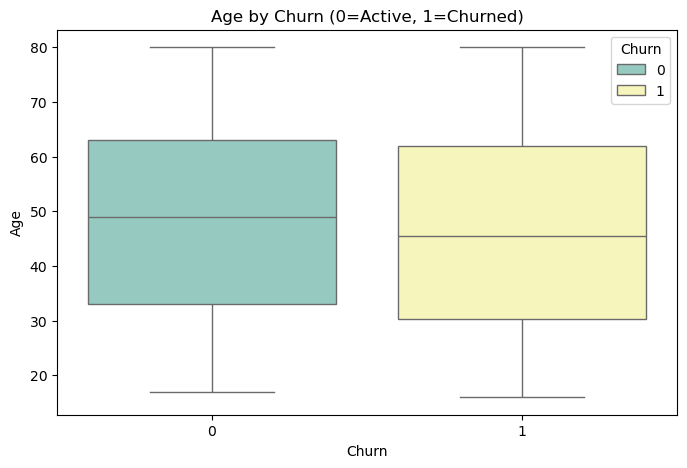

• Mean difference (Churned - Active): -1.56
• Potential predictor? → Weak

Bivariate: Device_Count vs Churn

Device_Count stats by Churn:
        count  mean   std  min  25%  50%  75%  max
Churn                                            
0      350.0  1.94  0.78  1.0  1.0  2.0  3.0  3.0
1      146.0  1.94  0.82  1.0  1.0  2.0  3.0  3.0


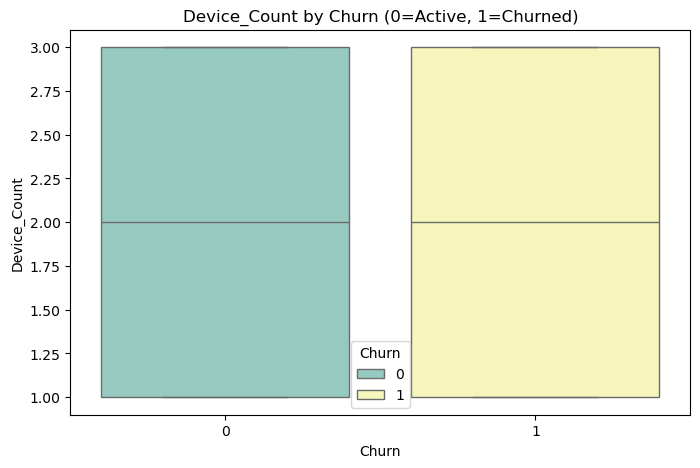

• Mean difference (Churned - Active): -0.0
• Potential predictor? → Weak

Bivariate: Active_Months vs Churn

Active_Months stats by Churn:
        count  mean   std  min  25%  50%  75%  max
Churn                                            
0      350.0  1.00  0.00  1.0  1.0  1.0  1.0  1.0
1      146.0  1.01  0.08  1.0  1.0  1.0  1.0  2.0


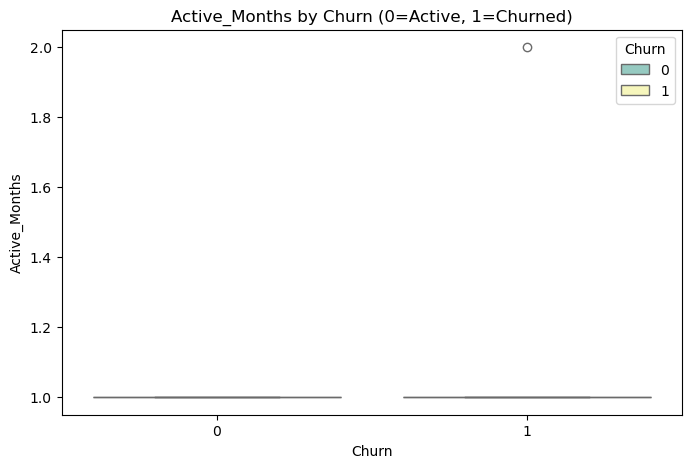

• Mean difference (Churned - Active): 0.01
• Potential predictor? → Weak

Bivariate: Total_Purchases vs Churn

Total_Purchases stats by Churn:
        count   mean    std  min   25%   50%   75%   max
Churn                                                  
0      350.0  21.05  11.58  1.0  13.0  20.0  28.0  51.0
1      146.0  20.01  10.65  1.0  12.0  19.0  27.0  48.0


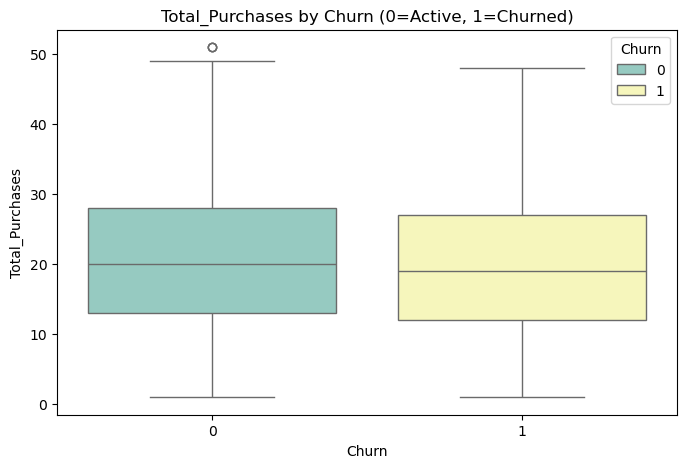

• Mean difference (Churned - Active): -1.04
• Potential predictor? → Weak

Bivariate: Avg_Unit_Price vs Churn

Avg_Unit_Price stats by Churn:
        count      mean       std    min     25%      50%      75%       max
Churn                                                                      
0      350.0  19800.12  21395.88  350.0  9000.0  14500.0  22000.0  150000.0
1      146.0  17156.62  16232.99  350.0  7562.5  14500.0  20825.0   92500.0


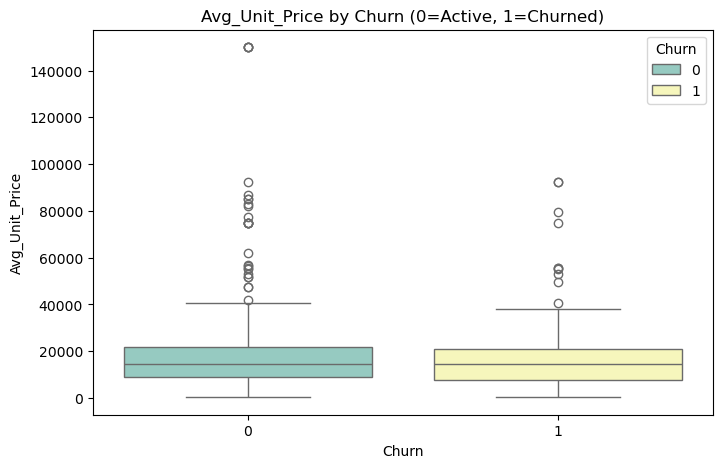

• Mean difference (Churned - Active): -2643.5
• Potential predictor? → Weak

Bivariate: Total_Revenue vs Churn

Total_Revenue stats by Churn:
        count       mean        std     min       25%       50%       75%  \
Churn                                                                      
0      350.0  403851.43  429315.45   900.0  114125.0  299250.0  539575.0   
1      146.0  397261.64  542058.87  1750.0   65775.0  240250.0  516000.0   

             max  
Churn             
0      3300000.0  
1      3340000.0  


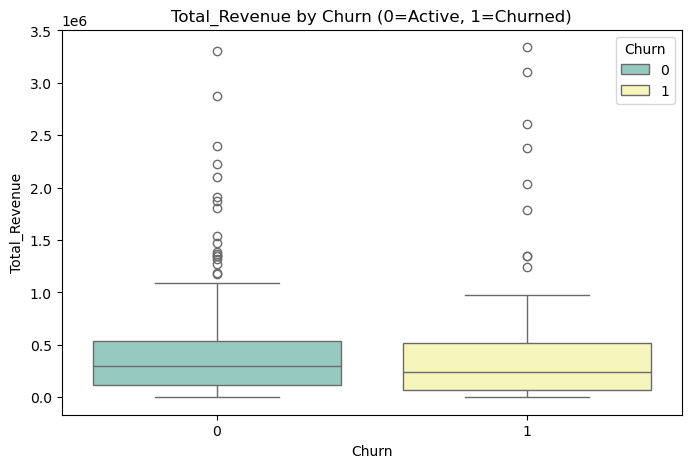

• Mean difference (Churned - Active): -6589.78
• Potential predictor? → Weak

Bivariate: Avg_Satisfaction_Rate vs Churn

Avg_Satisfaction_Rate stats by Churn:
        count  mean   std  min  25%  50%  75%  max
Churn                                            
0      350.0  2.93  1.36  1.0  2.0  3.0  4.0  5.0
1      146.0  3.08  1.41  1.0  2.0  3.0  4.0  5.0


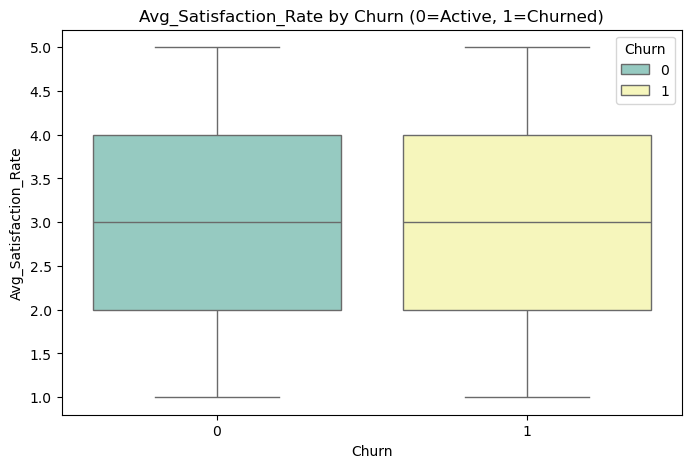

• Mean difference (Churned - Active): 0.15
• Potential predictor? → Weak

Bivariate: Customer_Tenure_Months vs Churn

Customer_Tenure_Months stats by Churn:
        count   mean    std  min    25%   50%    75%   max
Churn                                                    
0      350.0  31.20  17.47  1.0  17.25  30.0  47.00  60.0
1      146.0  32.09  17.15  2.0  17.00  32.5  46.75  60.0


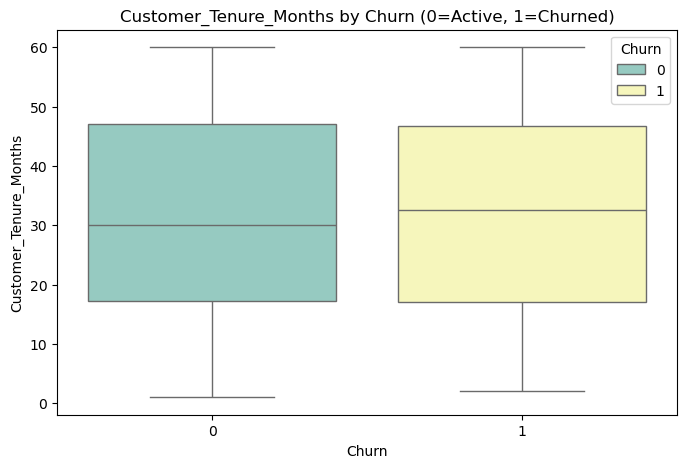

• Mean difference (Churned - Active): 0.89
• Potential predictor? → Weak

Bivariate: Avg_Data_Usage_GB vs Churn

Avg_Data_Usage_GB stats by Churn:
        count    mean    std   min    25%     50%     75%     max
Churn                                                           
0      350.0  100.47  45.43  0.89  67.03  103.07  132.65  196.77
1      146.0  103.42  43.88  7.10  71.98   99.76  138.50  199.46


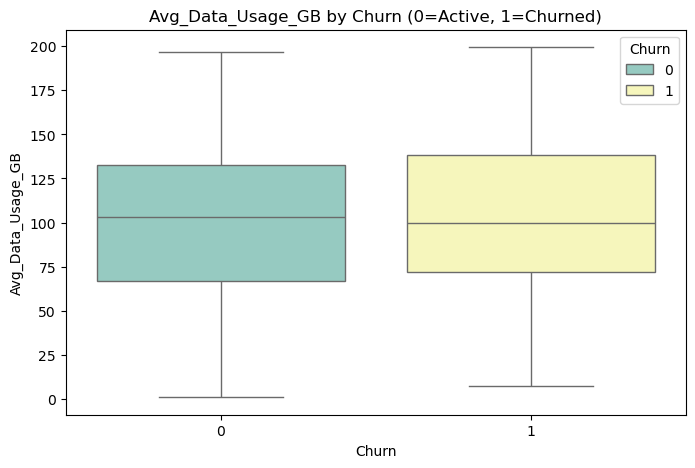

• Mean difference (Churned - Active): 2.94
• Potential predictor? → Weak

Bivariate: Total_Data_Usage_GB vs Churn

Total_Data_Usage_GB stats by Churn:
        count    mean     std   min     25%     50%     75%     max
Churn                                                             
0      350.0  193.10  109.07  0.89  119.52  176.28  271.06  508.51
1      146.0  199.57  113.97  7.10  117.86  177.70  277.16  503.44


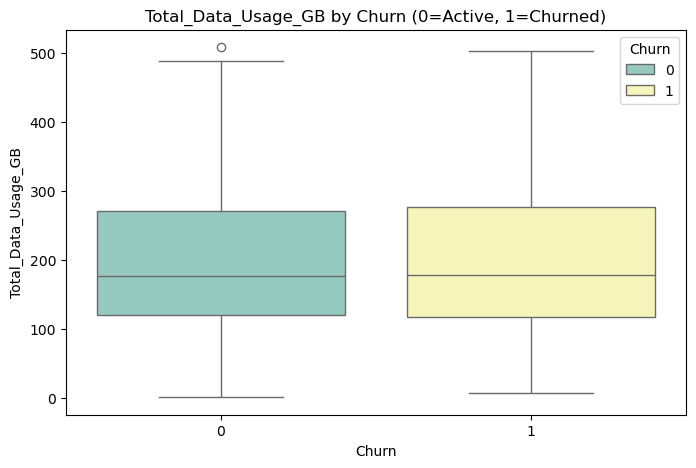

• Mean difference (Churned - Active): 6.46
• Potential predictor? → Weak

Bivariate: Avg_GB_Purchased vs Churn

Avg_GB_Purchased stats by Churn:
        count    mean     std   min    25%    50%    75%     max
Churn                                                          
0      350.0  131.44  208.31  0.49  28.12  75.42  152.9  1536.0
1      146.0  112.31  148.87  0.49  21.56  69.12  150.0   850.5


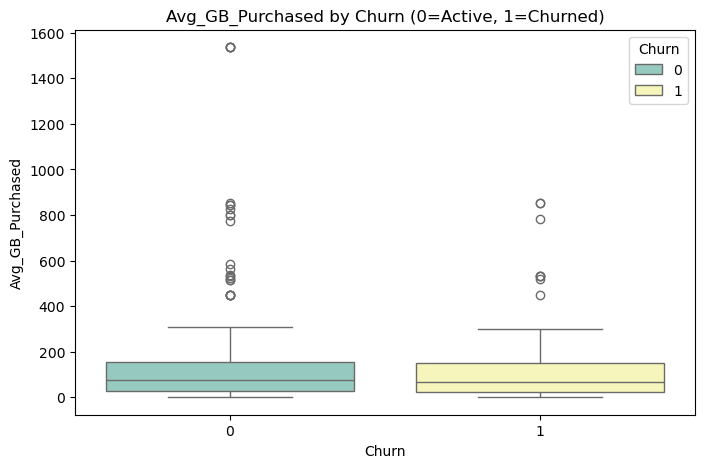

• Mean difference (Churned - Active): -19.13
• Potential predictor? → Weak

Bivariate: Total_GB_Purchased vs Churn

Total_GB_Purchased stats by Churn:
        count     mean      std   min     25%     50%     75%      max
Churn                                                                
0      350.0  2689.30  3968.10  1.46  392.44  1532.5  3548.0  32970.0
1      146.0  2795.81  5152.29  2.44  231.25  1135.0  3156.0  31494.0


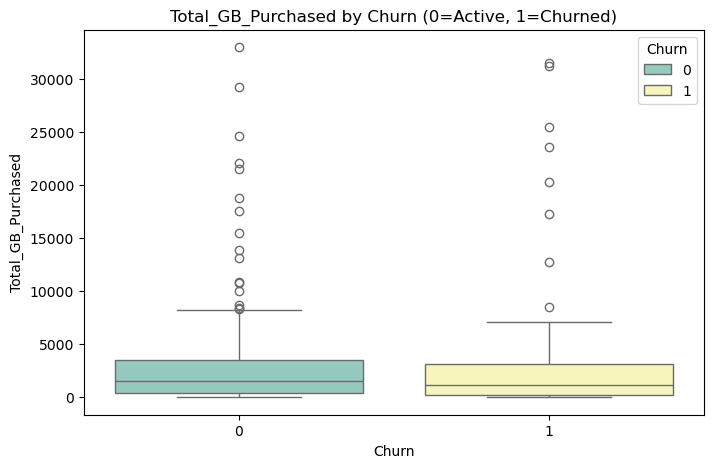

• Mean difference (Churned - Active): 106.52
• Potential predictor? → Weak

Bivariate: Usage_vs_Purchased_Ratio vs Churn

Usage_vs_Purchased_Ratio stats by Churn:
        count  mean   std  min   25%   50%   75%    max
Churn                                                 
0      350.0  1.09  4.85  0.0  0.05  0.12  0.36  55.48
1      146.0  1.63  7.60  0.0  0.07  0.14  0.58  81.70


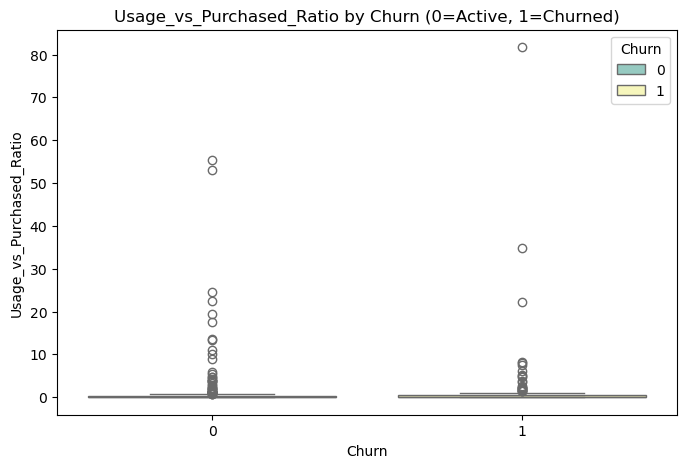

• Mean difference (Churned - Active): 0.54
• Potential predictor? → Yes

Bivariate: Revenue_per_Purchase vs Churn

Revenue_per_Purchase stats by Churn:
        count      mean       std    min      25%       50%       75%       max
Churn                                                                         
0      350.0  19877.64  22296.20  350.0  8029.24  14500.00  23956.52  150000.0
1      146.0  17650.87  19033.67  350.0  5890.62  13802.59  21070.19  135000.0


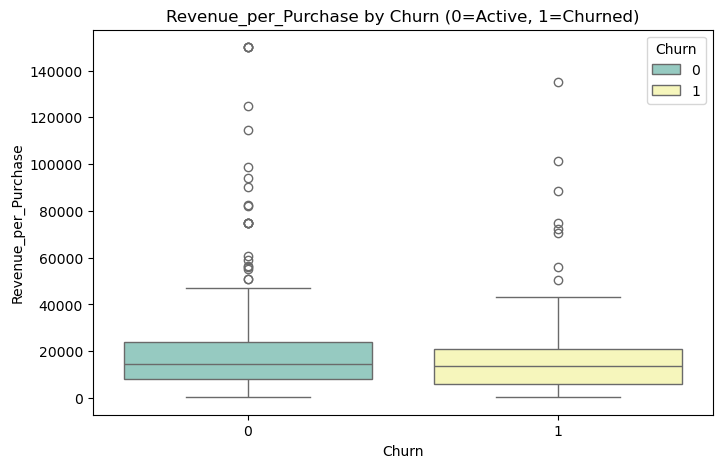

• Mean difference (Churned - Active): -2226.76
• Potential predictor? → Weak


In [27]:
for col in numerical_col:
    print(f"\n{'='*50}\nBivariate: {col} vs Churn")
    numeric_vs_churn(df, col)

### Quick Correlation Heatmap

In [28]:
num_features = numerical_col + ['Churn']
print(num_features)

['Age', 'Device_Count', 'Active_Months', 'Total_Purchases', 'Avg_Unit_Price', 'Total_Revenue', 'Avg_Satisfaction_Rate', 'Customer_Tenure_Months', 'Avg_Data_Usage_GB', 'Total_Data_Usage_GB', 'Avg_GB_Purchased', 'Total_GB_Purchased', 'Usage_vs_Purchased_Ratio', 'Revenue_per_Purchase', 'Churn']


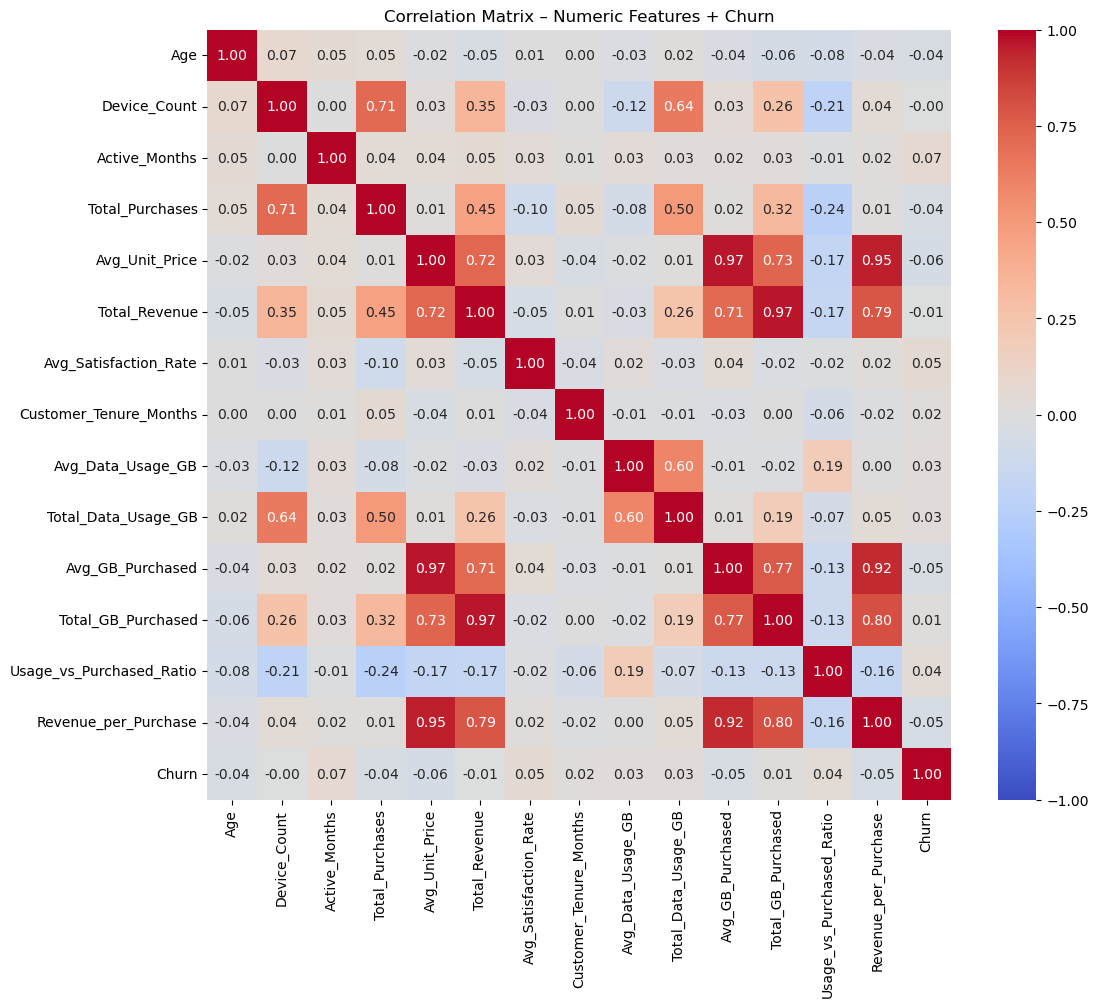

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    df[num_features].corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    fmt='.2f'
)
plt.title('Correlation Matrix – Numeric Features + Churn')
plt.show()

**There is significant redundancy among the monetary/data volume features:**

- Avg_Unit_Price ↔ Avg_GB_Purchased (0.97), Total_Revenue (0.72), Revenue_per_Purchase (0.95)
- Total_Revenue ↔ Total_GB_Purchased (0.97), Revenue_per_Purchase (0.79)
- Avg_GB_Purchased ↔ Total_GB_Purchased (0.77), Revenue_per_Purchase (0.92)
- Total_GB_Purchased ↔ Revenue_per_Purchase (0.80)
- Device_Count ↔ Total_Purchases (0.71)
- Avg_Data_Usage_GB ↔ Total_Data_Usage_GB (0.60) — moderate, but still correlated

**Clear redundancy clusters:**

- Price/Plan Size cluster: Avg_Unit_Price, Avg_GB_Purchased, Total_GB_Purchased
- Revenue cluster: Total_Revenue, Revenue_per_Purchase
- Usage cluster: Avg_Data_Usage_GB, Total_Data_Usage_GB

We should keep one representative from each cluster to avoid multicollinearity penalties in linear models and reduce noise in trees.

### Churn Reasons 

#### Reasons for Churn

In [30]:
churned = df[df['Churn'] == 1].copy()
churned.shape

(146, 24)

In [31]:
print(churned['Reasons_for_Churn'].count())
print(churned['Reasons_for_Churn'].isna().sum())

146
0


In [32]:
exploded = churned.explode('Reasons_for_Churn')

In [33]:
reasons = exploded['Reasons_for_Churn'].value_counts().head(10)
print("Top 10 Reasons for Churn:\n", reasons)

Top 10 Reasons for Churn:
 Reasons_for_Churn
Better Offers from Competitors    29
High Call Tarriffs                26
Poor Network                      20
Costly Data Plans                 20
Fast Data Consumption             18
Poor Customer Service             18
Relocation                        15
Name: count, dtype: int64


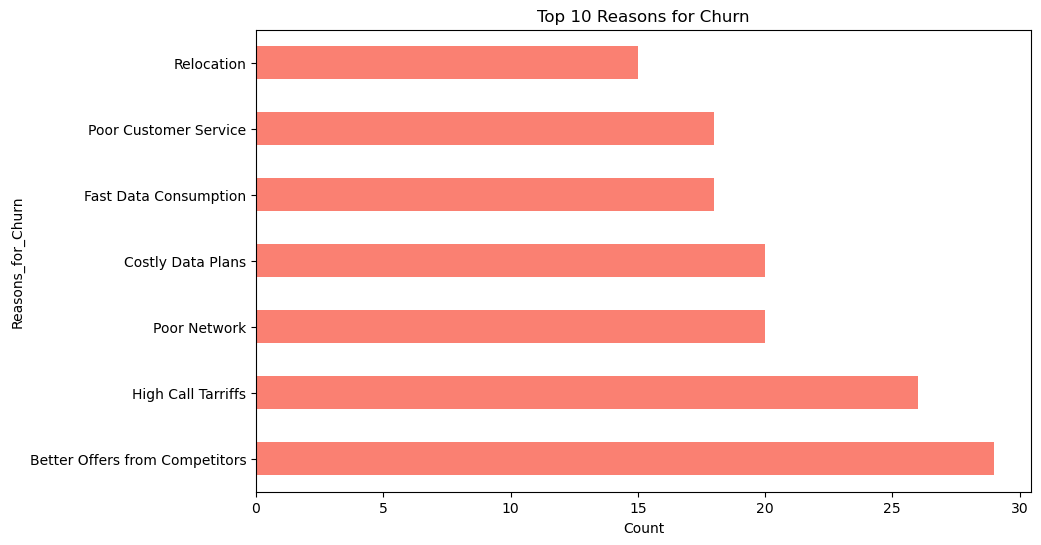

In [34]:
plt.figure(figsize=(10, 6))
reasons.plot(kind='barh', color='salmon')
plt.title('Top 10 Reasons for Churn')
plt.xlabel('Count')
plt.show()

#### Reasons for Churn by State

In [35]:
high_churn_states = top_states.values.tolist()
print("High churn states (top 10):", high_churn_states)

High churn states (top 10): ['Kogi', 'Osun', 'Bauchi', 'Abia', 'Borno', 'Abuja (FCT)', 'Enugu', 'Yobe', 'Oyo', 'Edo']


In [36]:
# Filter exploded to these states
high_states_df = exploded[exploded['State'].isin(high_churn_states)]

# Count per state + reason
reason_by_state = high_states_df.groupby(['State', 'Reasons_for_Churn']).size().reset_index(name='Count')

In [37]:
# Pivot for heatmap-style view
pivot_state_reason = reason_by_state.pivot(index='State', columns='Reasons_for_Churn', values='Count').fillna(0).astype(int)

# Sort rows by total mentions in that state
pivot_state_reason['Total'] = pivot_state_reason.sum(axis=1)
pivot_state_reason = pivot_state_reason.sort_values('Total', ascending=False).drop('Total', axis=1)

print("\nReasons Count by High-Churn State:\n")
pivot_state_reason


Reasons Count by High-Churn State:



Reasons_for_Churn,Better Offers from Competitors,Costly Data Plans,Fast Data Consumption,High Call Tarriffs,Poor Customer Service,Poor Network,Relocation
State,,,,,,,
Yobe,0,0,1,2,1,1,2
Abia,4,1,0,0,1,0,0
Abuja (FCT),1,3,0,0,1,1,0
Edo,0,0,0,0,3,1,2
Kogi,1,0,0,2,0,1,1
Oyo,1,1,1,0,1,1,0
Enugu,1,0,0,0,0,2,1
Bauchi,0,0,2,0,0,1,0
Osun,2,0,0,0,0,1,0


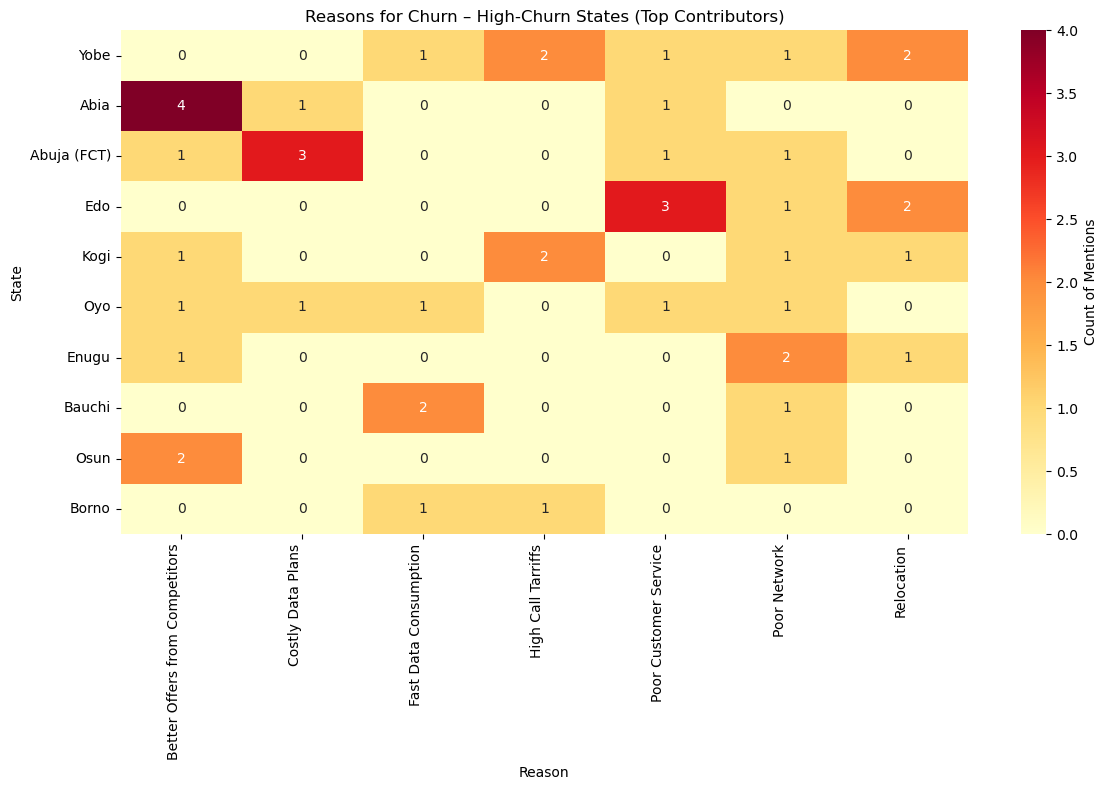

In [38]:
# Visual: Stacked bar or heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_state_reason, annot=True, cmap='YlOrRd', fmt='d', cbar_kws={'label': 'Count of Mentions'})
plt.title('Reasons for Churn – High-Churn States (Top Contributors)')
plt.xlabel('Reason')
plt.ylabel('State')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('C:\\Users\\KOLADE\\OneDrive\\Documents\\AkoladeDSJourney\\MTN-Nigeria-Customer-Churn\\reports\\plots\\churn_reasons_by_high_churn_state.png', dpi=150, bbox_inches='tight')
plt.show()

### EDA Summary

**EDA Summary – MTN Nigeria Customer Churn Prediction Project**
After completing univariate analysis, bivariate relationships with churn, correlation analysis, and reasons-for-churn deep dive, the following key insights emerged from the Q1 2025 customer-level dataset (~496 records, ~30% churn rate).

**1. Data Quality & Overall Profile**  
- Clean dataset with no major missing values or invalid entries.
- High skew in revenue and data usage features → log/winsorization recommended for modeling.
- Low variance in several columns (Active_Months, Device_Count, Is_Multi_Device) → safe to drop.

**2. Strongest Churn Signals Identified**  
- *`Primary_Plan_Type`* — clearest categorical driver: Daily & 2-Day plans → 37–40% churn rate vs Monthly ~28% and Yearly 0%.
- *`Usage_vs_Purchased_Ratio`* — strongest numeric signal: Churners consume relatively more of what they purchase (mean 1.63 vs 1.09 in active).
- *`State`* — large geographic variation: Hotspots Yobe (41%), Edo (37%), Abuja (FCT) (35%), Abia (33%); low-churn Borno (11%), Bauchi & Osun (15%).

**3. Weaker or Unexpected Signals**  
- Satisfaction (Avg_Satisfaction_Rate & Primary_Review) and tenure show weak / counter-intuitive differences → likely snapshot artifact.
- Demographics (Age, Gender) and device behavior show negligible impact.
- High multicollinearity among revenue/plan-size/usage volume features → keep only one representative per cluster.

**4. Top Stated Reasons for Churn**  
- Overall ranking (most frequent mentions):  
  1. Better Offers from Competitors  
  2. High Call Tariffs  
  3. Poor Customer Service / Costly Data Plans / Fast Data Consumption  
  4. Poor Network  
  5. Relocation (least actionable)
- By high-churn states:  
  - Abia & Abuja (FCT): dominated by *Better Offers from Competitors* and *Costly Data Plans* 
  - Edo & Yobe: strong presence of *Poor Network* and *High Call Tariffs*

**5. Core Modeling Set (7–9 features – clean & interpretable)**  

| Feature                        | Type        | Why Keep?                                                                 | Transformation / Encoding                  |
|--------------------------------|-------------|---------------------------------------------------------------------------|--------------------------------------------|
| Primary_Plan_Type              | Categorical | Strongest categorical signal (Daily/2-Day ~37–40% churn)                 | One-hot encode                             |
| State                          | Categorical | Large regional variation (Yobe 41%, Borno 11%) – actionable targeting    | Group rare states → One-hot or target encode |
| Usage_vs_Purchased_Ratio       | Numeric     | Strongest numeric separation in bivariate (higher in churners)            | Log or winsorize if extreme outliers       |
| Customer_Tenure_Months         | Numeric     | Domain-critical, even if weak here (classic churn driver)                 | Keep as-is or bin                          |
| Total_Revenue                  | Numeric     | Proxy for customer value – protect high-LTV churners                      | Log transform (high skew)                  |
| Avg_Satisfaction_Rate          | Numeric     | Domain-important, interpretable – keep despite weak direct signal         | Keep as-is                                 |
| Primary_Review                 | Categorical | Interpretable – test if it adds value over numeric satisfaction           | One-hot encode                             |
| Avg_Data_Usage_GB              | Numeric     | Companion to ratio – helps size offers                                    | Optional (test)                            |

**6. Business & Modeling Takeaways**  
- Churn appears driven primarily by *price sensitivity / competition*, *short plan commitment*, *heavy relative data consumption*, and *regional factors* (network quality & competition intensity).
- Retention opportunities:
  - Convert short-cycle users to longer plans
  - Offer bigger data add-ons or fair-usage adjustments to high usage-ratio customers
  - Prioritize network/pricing interventions in Yobe, Edo, Abuja (FCT), Abia
- Modeling direction:
  - Tree-based models expected to outperform linear models (non-linear patterns, weak linear correlations)
  - Focus on recall & PR-AUC due to class imbalance

Next: `03_baseline_modeling.ipynb` — building and evaluating initial classifiers to quantify risk and validate these insights.

### Export Tables for Power BI Dashboard

Exporting key aggregated tables to `reports/powerbi/` folder for easy import into Power BI.

In [40]:
import os

In [41]:
# Create folder if it doesn't exist
export_dir = r'C:\Users\KOLADE\OneDrive\Documents\AkoladeDSJourney\MTN-Nigeria-Customer-Churn\reports\powerbi'
os.makedirs(export_dir, exist_ok=True)

In [45]:
print("Exporting tables for Power BI...")

# 1. Main customer-level dataset (full for slicers, drill-down, segments)
df.to_csv(f'{export_dir}\mtn_customer_churn_full_for_pbi.csv', index=False)
print("1. Exported: mtn_customer_churn_full_for_pbi.csv")

# 2. State-level summary (churn rate, counts – for map, bar, KPIs)
state_summary = (
    df.groupby('State', as_index=False)
      .agg(
          Total_Customers=('Customer ID', 'count'),
          Churned_Customers=('Churn', 'sum'),
          Churn_Rate=('Churn', 'mean')
      )
)
state_summary['Churn_Rate'] = (state_summary['Churn_Rate'] * 100).round(2)
state_summary['Active_Customers'] = state_summary['Total_Customers'] - state_summary['Churned_Customers']
state_summary = state_summary[['State', 'Total_Customers', 'Active_Customers', 'Churned_Customers', 'Churn_Rate']]
state_summary.to_csv(f'{export_dir}\state_churn_summary_for_pbi.csv', index=False)
print("2. Exported: state_churn_summary_for_pbi.csv")

# 3. Reasons by State pivot (for heatmap / matrix on regional reasons page)
# Reuse or recreate from earlier exploded data
if 'pivot_state_reason' in globals():
    pivot_state_reason.to_csv(f'{export_dir}/reasons_by_state_pivot_for_pbi.csv')
    print("3. Exported: reasons_by_state_pivot_for_pbi.csv (using existing pivot)")
else:
    # If pivot not in memory, recreate minimally
    churned = df[df['Churn'] == 1].copy()
    churned['Reasons_List'] = churned['Reasons_for_Churn'].fillna('').str.split(r',\s*')
    exploded = churned.explode('Reasons_List')
    exploded['Reason'] = exploded['Reasons_List'].str.strip().str.title()
    exploded = exploded[exploded['Reason'] != '']
    
    reason_by_state = exploded.groupby(['State', 'Reason']).size().reset_index(name='Count')
    pivot = reason_by_state.pivot(index='State', columns='Reason', values='Count').fillna(0).astype(int)
    pivot.to_csv(f'{export_dir}\reasons_by_state_pivot_for_pbi.csv')
    print("3. Exported: reasons_by_state_pivot_for_pbi.csv (recreated)")

# 4. Top reasons overall (for bar chart on overview page)
if 'top_reasons_overall' in globals():
    top_reasons_overall.to_frame(name='Count').reset_index().to_csv(
        f'{export_dir}\top_reasons_overall_for_pbi.csv', index=False
    )
    print("4. Exported: top_reasons_overall_for_pbi.csv")
else:
    # Quick recreate
    top_reasons = exploded['Reasons_for_Churn'].value_counts().head(10)
    top_reasons.to_frame(name='Count').reset_index().to_csv(
        f'{export_dir}/top_reasons_overall_for_pbi.csv', index=False
    )
    print("4. Exported: top_reasons_overall_for_pbi.csv (recreated)")

print("\nAll files exported to:", os.path.abspath(export_dir))
print("Next: Open Power BI Desktop → Get Data → Text/CSV → import these files")

Exporting tables for Power BI...
1. Exported: mtn_customer_churn_full_for_pbi.csv
2. Exported: state_churn_summary_for_pbi.csv
3. Exported: reasons_by_state_pivot_for_pbi.csv (using existing pivot)
4. Exported: top_reasons_overall_for_pbi.csv (recreated)

All files exported to: C:\Users\KOLADE\OneDrive\Documents\AkoladeDSJourney\MTN-Nigeria-Customer-Churn\reports\powerbi
Next: Open Power BI Desktop → Get Data → Text/CSV → import these files
